In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
data=nc.Dataset('/ihesp/archive/Sunway_Runs/HR_HF_TNST/B.E.13.BTRANS.ne120_t12.sehires38.003.sunway.pop.h.AICE.185001.210012.nc')
plotvar2 = data.variables['aice'][:,248:344,600:1400]

In [3]:
aveplot = plotvar2.mean(axis=1)

In [4]:
nu = np.arange(6,3012,12)
result = np.zeros((1004,800))

In [5]:
ii = 0
for i in nu:
    result[ii] = aveplot[i,:]
    result[ii+1] = aveplot[i+1,:]
    result[ii+2] = aveplot[i+2,:]
    result[ii+3] = aveplot[i+3,:]
    ii = ii +4

In [6]:
A = np.arange(1004)
B = np.arange(800)
xx, yy = np.meshgrid(B, A)

In [11]:
# nice_cmap 控制色段 （130 白色）；nice_levels 控制color bar 标号
#################################################################
nice_cmap=sns.diverging_palette(245, 10, n=12,as_cmap=True)
lev_cmap = nice_cmap([0,10,30,40,50,60,80,90,105,115,125,130]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_levels = [20,30,40,50,60,70,80]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)


/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The following kwargs were not used by contour: 'spacing'
  


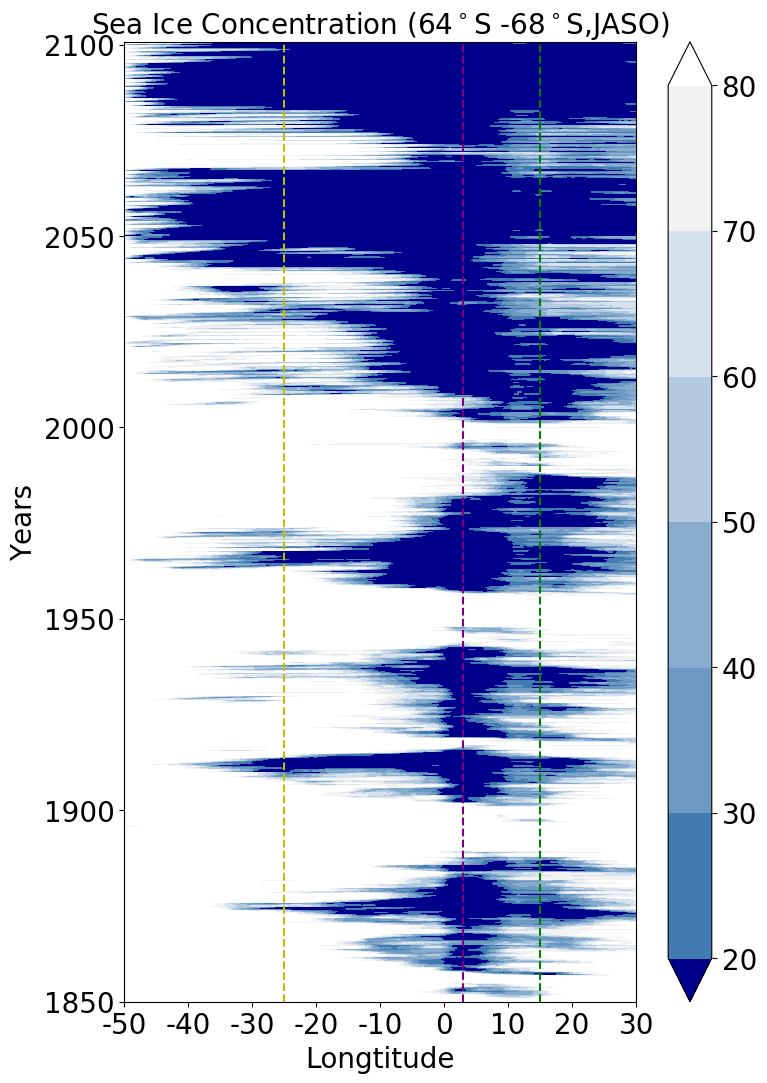

In [12]:
# plot the result
fig = plt.figure(figsize=(8, 12),dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
my_font = {'fontname':'Cambria', 'size':'20'}
im = ax0.contourf(xx, yy, result,cmap = new_cmap,norm =norm,spacing = 'uniform',\
                  levels = nice_levels,extend='both')

im.cmap.set_over('white')
im.cmap.set_under('darkblue')
#CS = ax0.contour(xx[:,430],yy[:,430],colors = 'r')
cbar = fig.colorbar(im, ax=ax0,ticks=nice_levels)
cbar.ax.tick_params(labelsize=20)
#plt.hlines((27-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((39-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((56-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((69-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((94-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((106-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((120-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((138-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((168-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((203-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((252-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((261-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((300-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((326-20)*4, 0, 699, colors = "y",linestyles = "dashed")
plt.vlines(530, 0, 1003, colors = "purple",linestyles = "dashed")
plt.vlines(650, 0, 1003, colors = "g",linestyles = "dashed")
plt.vlines(250, 0, 1003, colors = "y",linestyles = "dashed")
#plt.vlines(130, 0, 309, colors = "k",linestyles = "dashed")
#############################################################################
##设定X坐标值
#plt.xticks(range(0,701,100), ['-40', '-30', '-20', '-10', '0','10','20','30'],**my_font)

plt.xticks(range(0,801,100), ['-50','-40','-30','-20','-10', '0', '10', '20','30'],**my_font)
plt.yticks(range(0,1005,200), ['1850', '1900','1950', '2000','2050','2100'],**my_font)
plt.xlabel('Longtitude',**my_font)
plt.xlabel('Longtitude',**my_font)
plt.ylabel('Years',**my_font)
#ax0.set_title('Mix Layer Depth (64$^\circ$S - 68$^\circ$S)',**my_font)
ax0.set_title('Sea Ice Concentration (64$^\circ$S -68$^\circ$S,JASO)',**my_font)
plt.savefig("ice250.png",bbox_inches='tight',dpi=fig.dpi)